In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("Solarize_Light2")
sns.set_theme()

df = pd.read_csv("data/most_popular_steam_games_backup.csv")
print(df.shape)
df.head()

(408, 20)


,appid,SteamCharts Name,Current Players,Peak Players,game name,Free game?,Base Price (USD),Current Price (USD),Discount Percentage,On sale?,Release Date,Metacritic Score,Total Recommendations,OC_ID,OC_Name,TopCriticScore,MedianCriticScore,PercentRecommended,TotalReviews,OC_Tier
0,730.0,Counter-Strike 2,870412.0,1597285.0,Counter-Strike 2,True,0.00,0.00,NaN,False,21-Aug-12,NaN,4785450.0,15609.0,Counter-Strike 2,80.000000,75.0,87.500000,10.0,Strong
1,570.0,Dota 2,585775.0,888896.0,Dota 2,True,0.00,0.00,NaN,False,9-Jul-13,90.0,14354.0,9753.0,Dota 2,90.941176,90.0,100.000000,17.0,Mighty
2,1808500.0,ARC Raiders,420340.0,459483.0,ARC Raiders,False,39.99,39.99,0.0,False,30-Oct-25,NaN,109174.0,19023.0,ARC Raiders,86.950000,90.0,90.666667,75.0,Mighty
3,2807960.0,Battlefield™ 6,212131.0,563989.0,Battlefield™ 6,False,69.99,59.49,15.0,True,10-Oct-25,82.0,194205.0,19051.0,Battlefield 6,83.317647,85.0,90.410959,147.0,Strong
4,3564740.0,Where Winds Meet,189670.0,249851.0,Where Winds Meet,True,0.00,0.00,NaN,False,14-Nov-25,NaN,NaN,19677.0,Where Winds Meet,73.153846,80.0,61.904762,21.0,Fair


In [2]:
# Clean release dates into datetime and years
if "Release Date" in df.columns:
    df["Release Date Formatted"] = pd.to_datetime(df["Release Date"], errors="coerce")
    df["Release Year"] = df["Release Date Formatted"].dt.year
else:
    df["Release Year"] = np.nan

# Extract age of each game
current_year = pd.Timestamp.today().year
df["Game Age (Years)"] = current_year - df["Release Year"]

df["Popularity_Factor"] = df["Current Players"] / df["Peak Players"]

# Modify the critic score to be between a range of 0-1
df["Critic Score Normalized"] = df["TopCriticScore"] / 100

# Attempt to account for $$$ by incorporating the cost
df["Dollar Value"] = df["Critic Score Normalized"] / (df["Current Price (USD)"] + 1)

print(df.shape)
df.head(50)


(408, 26)


C:\Users\macmc\AppData\Local\Temp\ipykernel_16144\691269666.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Release Date Formatted"] = pd.to_datetime(df["Release Date"], errors="coerce")


,appid,SteamCharts Name,Current Players,Peak Players,game name,Free game?,Base Price (USD),Current Price (USD),Discount Percentage,On sale?,...,MedianCriticScore,PercentRecommended,TotalReviews,OC_Tier,Release Date Formatted,Release Year,Game Age (Years),Popularity_Factor,Critic Score Normalized,Dollar Value
0,730.0,Counter-Strike 2,870412.0,1597285.0,Counter-Strike 2,True,0.00,0.00,NaN,False,...,75.00,87.500000,10.0,Strong,2012-08-21,2012.0,13.0,0.544932,0.800000,0.800000
1,570.0,Dota 2,585775.0,888896.0,Dota 2,True,0.00,0.00,NaN,False,...,90.00,100.000000,17.0,Mighty,2013-07-09,2013.0,12.0,0.658992,0.909412,0.909412
2,1808500.0,ARC Raiders,420340.0,459483.0,ARC Raiders,False,39.99,39.99,0.0,False,...,90.00,90.666667,75.0,Mighty,2025-10-30,2025.0,0.0,0.914811,0.869500,0.021212
3,2807960.0,Battlefield™ 6,212131.0,563989.0,Battlefield™ 6,False,69.99,59.49,15.0,True,...,85.00,90.410959,147.0,Strong,2025-10-10,2025.0,0.0,0.376126,0.833176,0.013774
4,3564740.0,Where Winds Meet,189670.0,249851.0,Where Winds Meet,True,0.00,0.00,NaN,False,...,80.00,61.904762,21.0,Fair,2025-11-14,2025.0,0.0,0.759132,0.731538,0.731538
5,578080.0,PUBG: BATTLEGROUNDS,123697.0,750442.0,PUBG: BATTLEGROUNDS,True,0.00,0.00,NaN,False,...,70.00,28.571429,22.0,Fair,2017-12-21,2017.0,8.0,0.164832,0.713810,0.713810
6,252490.0,Rust,97631.0,184595.0,Rust,False,39.99,39.99,0.0,False,...,65.00,29.629630,28.0,Fair,2018-02-08,2018.0,7.0,0.528893,0.669091,0.016323
7,2767030.0,Marvel Rivals,93567.0,127557.0,Marvel Rivals,True,0.00,0.00,NaN,False,...,80.00,83.636364,59.0,Strong,2024-12-05,2024.0,1.0,0.733531,0.782222,0.782222
8,1938090.0,Call of Duty®,82274.0,91752.0,Call of Duty®,False,NaN,NaN,NaN,False,...,80.00,69.594595,155.0,Strong,2022-10-27,2022.0,3.0,0.896700,0.779615,NaN
9,2923300.0,Banana,74327.0,114228.0,Banana,True,0.00,0.00,NaN,False,...,45.00,6.250000,16.0,Weak,2024-04-23,2024.0,1.0,0.650690,0.432857,0.432857


In [3]:
# Creates a clean copy of the dataframe if there is an opencritic tier review - eliminates all NaN 
df_clean = df.copy()

df_clean = df_clean[df_clean["OC_Tier"].notna() & (df_clean["OC_Tier"].astype(str).str.strip() != "")]

print("After OpenCritic Filtering:", len(df_clean), "from", len(df))

After OpenCritic Filtering: 291 from 408


In [4]:
# Some games are not marked as free and do not contain a price, sometimes these are bundles for games and work as a single launcher. These are filtered out.
df_clean["Current Price (USD)"] = pd.to_numeric(df_clean["Current Price (USD)"], errors="coerce")

Mask_Valid_Paid = ((df_clean["Free game?"] == False) & (df_clean["Current Price (USD)"] > 0))
Mask_Valid_Free = (df_clean["Free game?"] == True)

df_clean = df_clean[Mask_Valid_Paid | Mask_Valid_Free]
print("After removing erroneous price entries, for example games that appear as bundles and have no price:", len(df_clean))

print(df_clean.shape)
df_clean.head(50)

After removing erroneous price entries, for example games that appear as bundles and have no price: 286
(286, 26)


,appid,SteamCharts Name,Current Players,Peak Players,game name,Free game?,Base Price (USD),Current Price (USD),Discount Percentage,On sale?,...,MedianCriticScore,PercentRecommended,TotalReviews,OC_Tier,Release Date Formatted,Release Year,Game Age (Years),Popularity_Factor,Critic Score Normalized,Dollar Value
0,730.0,Counter-Strike 2,870412.0,1597285.0,Counter-Strike 2,True,0.00,0.00,NaN,False,...,75.00,87.500000,10.0,Strong,2012-08-21,2012.0,13.0,0.544932,0.800000,0.800000
1,570.0,Dota 2,585775.0,888896.0,Dota 2,True,0.00,0.00,NaN,False,...,90.00,100.000000,17.0,Mighty,2013-07-09,2013.0,12.0,0.658992,0.909412,0.909412
2,1808500.0,ARC Raiders,420340.0,459483.0,ARC Raiders,False,39.99,39.99,0.0,False,...,90.00,90.666667,75.0,Mighty,2025-10-30,2025.0,0.0,0.914811,0.869500,0.021212
3,2807960.0,Battlefield™ 6,212131.0,563989.0,Battlefield™ 6,False,69.99,59.49,15.0,True,...,85.00,90.410959,147.0,Strong,2025-10-10,2025.0,0.0,0.376126,0.833176,0.013774
4,3564740.0,Where Winds Meet,189670.0,249851.0,Where Winds Meet,True,0.00,0.00,NaN,False,...,80.00,61.904762,21.0,Fair,2025-11-14,2025.0,0.0,0.759132,0.731538,0.731538
5,578080.0,PUBG: BATTLEGROUNDS,123697.0,750442.0,PUBG: BATTLEGROUNDS,True,0.00,0.00,NaN,False,...,70.00,28.571429,22.0,Fair,2017-12-21,2017.0,8.0,0.164832,0.713810,0.713810
6,252490.0,Rust,97631.0,184595.0,Rust,False,39.99,39.99,0.0,False,...,65.00,29.629630,28.0,Fair,2018-02-08,2018.0,7.0,0.528893,0.669091,0.016323
7,2767030.0,Marvel Rivals,93567.0,127557.0,Marvel Rivals,True,0.00,0.00,NaN,False,...,80.00,83.636364,59.0,Strong,2024-12-05,2024.0,1.0,0.733531,0.782222,0.782222
9,2923300.0,Banana,74327.0,114228.0,Banana,True,0.00,0.00,NaN,False,...,45.00,6.250000,16.0,Weak,2024-04-23,2024.0,1.0,0.650690,0.432857,0.432857
10,1086940.0,Baldur's Gate 3,70486.0,81071.0,Baldur's Gate 3,False,59.99,59.99,0.0,False,...,98.00,97.402597,161.0,Mighty,2023-08-03,2023.0,2.0,0.869435,0.958725,0.015719


In [5]:
# Copies separate data sets for free and paid games
df_free = df_clean[df_clean["Free game?"] == True].copy()
df_paid = df_clean[df_clean["Free game?"] == False].copy()
df_discounted = df_paid[df_paid["Discount Percentage"].fillna(0) > 0].copy()

print("Total free games:", len(df_free))
print("Total paid games:", len(df_paid))
print("Total discounted games:", len(df_discounted))

Total free games: 60
Total paid games: 226
Total discounted games: 86


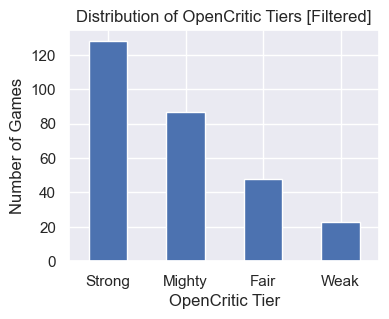

In [21]:
# Histogram of Critic Tiers
plt.figure(figsize=(4,3))
df_clean["OC_Tier"].value_counts().plot(kind="bar")

plt.xlabel("OpenCritic Tier")
plt.ylabel("Number of Games")
plt.title("Distribution of OpenCritic Tiers [Filtered]")
plt.xticks(rotation=0)

plt.show()

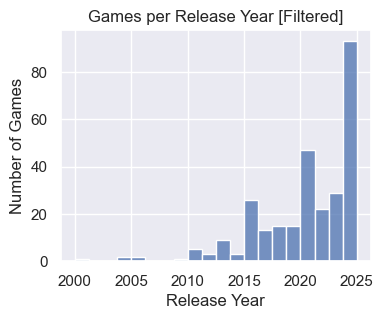

In [22]:
# Histogram of Release Date
plt.figure(figsize=(4,3))
sns.histplot(df_clean["Release Year"].dropna(), bins=20)

plt.xlabel("Release Year")
plt.ylabel("Number of Games")
plt.title("Games per Release Year [Filtered]")
plt.xticks(rotation=0)

plt.show()

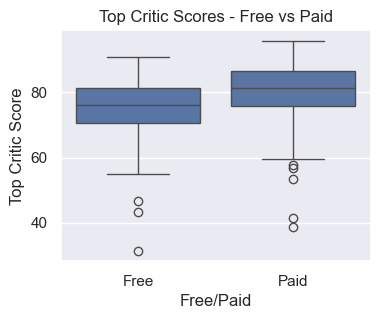

In [23]:
# Boxplot of Free vs Paid (Top Score)
plt.figure(figsize=(4,3))
sns.boxplot(df_clean, x=df_clean["Free game?"].map({True: "Free", False: "Paid"}), y=df_clean["TopCriticScore"])

plt.xlabel("Free/Paid")
plt.ylabel("Top Critic Score")
plt.title("Top Critic Scores - Free vs Paid")
plt.xticks(rotation=0)

plt.show()

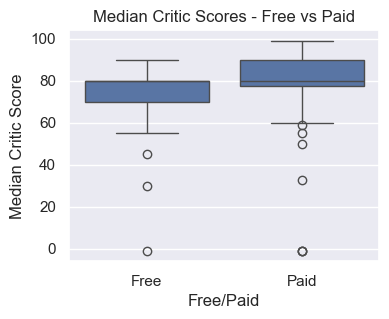

In [24]:
# Boxplot of Free vs Paid (Median Score)
plt.figure(figsize=(4,3))
sns.boxplot(df_clean, x=df_clean["Free game?"].map({True: "Free", False: "Paid"}), y=df_clean["MedianCriticScore"])

plt.xlabel("Free/Paid")
plt.ylabel("Median Critic Score")
plt.title("Median Critic Scores - Free vs Paid")
plt.xticks(rotation=0)

plt.show()

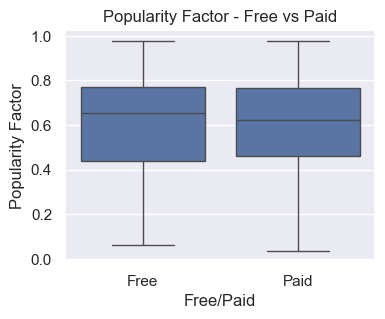

In [25]:
# Boxplot of Free vs Paid (Popularity Factor)
plt.figure(figsize=(4,3))
sns.boxplot(df_clean.dropna(subset=["Popularity_Factor"]), x=df_clean["Free game?"].map({True: "Free", False: "Paid"}), y=df_clean["Popularity_Factor"])

plt.xlabel("Free/Paid")
plt.ylabel("Popularity Factor")
plt.title("Popularity Factor - Free vs Paid")
plt.xticks(rotation=0)

plt.show()

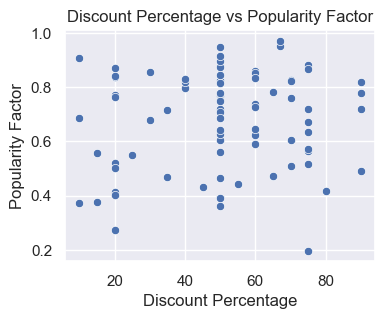

Correlation between the discount percentage and the popularity factor: 0.07348265590140524


In [26]:
# Scatterplot Discount Percentage and Popularity 
plt.figure(figsize=(4,3))
sns.scatterplot(df_discounted, x="Discount Percentage", y="Popularity_Factor")
    
plt.xlabel("Discount Percentage")
plt.ylabel("Popularity Factor")
plt.title("Discount Percentage vs Popularity Factor")
plt.xticks(rotation=0)

plt.show()

correlation_discount_popularity = df_discounted[["Discount Percentage", "Popularity_Factor"]].corr().iloc[0,1]
print(f"Correlation between the discount percentage and the popularity factor: {correlation_discount_popularity}")

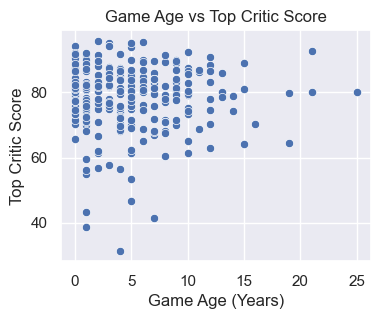

In [27]:
# Scatterplot of Ratings vs Age
plt.figure(figsize=(4,3))
sns.scatterplot(df_clean.dropna(subset=["Game Age (Years)", "TopCriticScore"]), x="Game Age (Years)", y="TopCriticScore")
    
plt.xlabel("Game Age (Years)")
plt.ylabel("Top Critic Score")
plt.title("Game Age vs Top Critic Score")
plt.xticks(rotation=0)

plt.show()

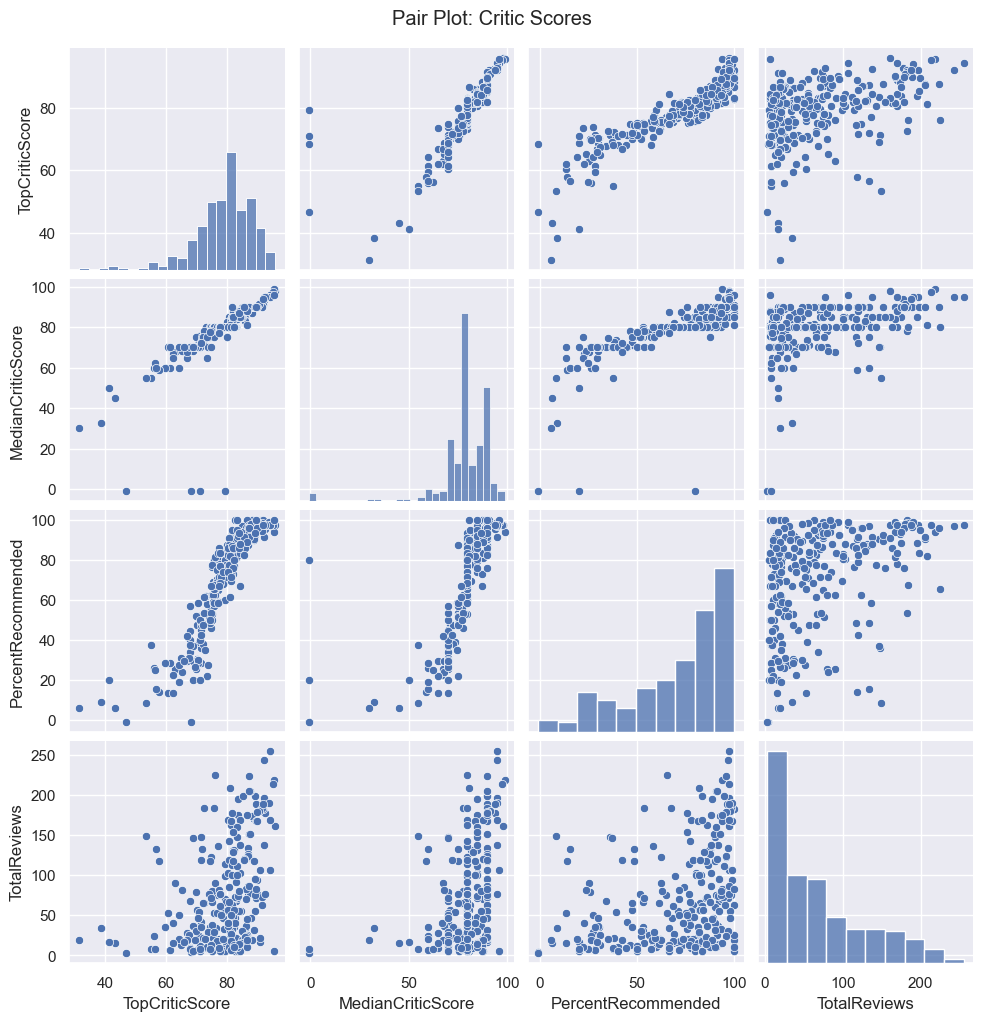

In [13]:
# Pair plot for comparison of reviews
columns = ["TopCriticScore", "MedianCriticScore", "PercentRecommended", "TotalReviews"]
sns.pairplot(df_clean[columns].dropna())
plt.suptitle("Pair Plot: Critic Scores", y=1.02)

plt.show()

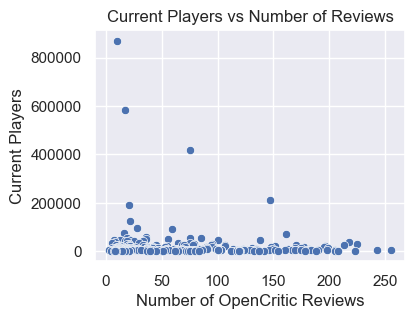

Correlation between the total OpenCritic reviews and the current number of players: 0.020696636441341964


In [28]:
# Scatterplot to compare  # of Reviews and # of Current Players
plt.figure(figsize=(4,3))
sns.scatterplot(df_clean, x="TotalReviews", y="Current Players")

plt.xlabel("Number of OpenCritic Reviews")
plt.ylabel("Current Players")
plt.title("Current Players vs Number of Reviews")

plt.show()

correlation_totalreviews_currentplayers = df_discounted[["TotalReviews", "Current Players"]].corr().iloc[0,1]
print(f"Correlation between the total OpenCritic reviews and the current number of players: {correlation_totalreviews_currentplayers}")

In [179]:
Price = df_clean["Current Price (USD)"].fillna(0)
Score = df_clean["TopCriticScore"].fillna(0)

df_clean["Value"] = (Score * df_clean["Popularity_Factor"]) / (Price + 200)

best_overall_games = df_clean.sort_values("Value", ascending=False).head(5)
worst_games = df_clean.sort_values("Value", ascending=True).head(5)




In [180]:
print("Top 5 best value games:")
best_overall_games[["game name", "Current Price (USD)", "TopCriticScore", "Popularity_Factor", "Value"]]

Top 5 best value games:


,game name,Current Price (USD),TopCriticScore,Popularity_Factor,Value
119,Magic: The Gathering Arena,0.00,82.448276,0.978110,0.403218
31,Risk of Rain 2,8.24,86.052632,0.952936,0.393789
167,Fallout: New Vegas,9.99,81.166667,0.977123,0.377684
97,Lost Ark,0.00,81.691176,0.909796,0.371612
361,Disco Elysium - The Final Cut,9.99,89.235294,0.865516,0.367801


In [177]:
print("Bottom 5 value games:")
worst_games[["game name", "Current Price (USD)", "TopCriticScore", "Popularity_Factor", "Value"]]


Bottom 5 value games:


,game name,Current Price (USD),TopCriticScore,Popularity_Factor,Value
122,Escape From Duckov,17.99,77.500000,0.036804,0.024174
314,New World: Aeternum,59.99,72.000000,0.058605,0.026374
152,NARAKA: BLADEPOINT,0.00,72.166667,0.061585,0.044444
280,Black Myth: Wukong,59.99,81.530303,0.139661,0.071171
271,The Outlast Trials,39.99,72.487179,0.164542,0.085200


In [181]:
Price = df_paid["Current Price (USD)"].fillna(0)
Score = df_paid["TopCriticScore"].fillna(0)

df_paid["Value"] = ((Score * df_paid["Popularity_Factor"]) / (Price + 200))

best_paid_games = df_paid.sort_values("Value", ascending=False).head(5)

In [182]:
print("Top 5 best paid value games:")
best_paid_games[["game name", "Current Price (USD)", "TopCriticScore", "Popularity_Factor", "Value"]]

Top 5 best paid value games:


,game name,Current Price (USD),TopCriticScore,Popularity_Factor,Value
31,Risk of Rain 2,8.24,86.052632,0.952936,0.393789
167,Fallout: New Vegas,9.99,81.166667,0.977123,0.377684
361,Disco Elysium - The Final Cut,9.99,89.235294,0.865516,0.367801
128,Balatro,14.99,91.638889,0.860538,0.366802
191,God of War,19.99,94.241379,0.853585,0.365667


In [183]:
Price = df_free["Current Price (USD)"].fillna(0)
Score = df_free["TopCriticScore"].fillna(0)

df_free["Value"] = ((Score * df_free["Popularity_Factor"]) / (Price + 200))

best_free_games = df_free.sort_values("Value", ascending=False).head(5)

In [184]:
print("Top 5 best free games:")
best_free_games[["game name", "Current Price (USD)", "TopCriticScore", "Popularity_Factor", "Value"]]

Top 5 best free games:


,game name,Current Price (USD),TopCriticScore,Popularity_Factor,Value
119,Magic: The Gathering Arena,0.0,82.448276,0.978110,0.403218
97,Lost Ark,0.0,81.691176,0.909796,0.371612
204,SMITE 2,0.0,81.160000,0.894909,0.363154
305,RISK: Global Domination,0.0,77.500000,0.934247,0.362021
365,DRAGON BALL GEKISHIN SQUADRA,0.0,82.285714,0.853774,0.351267


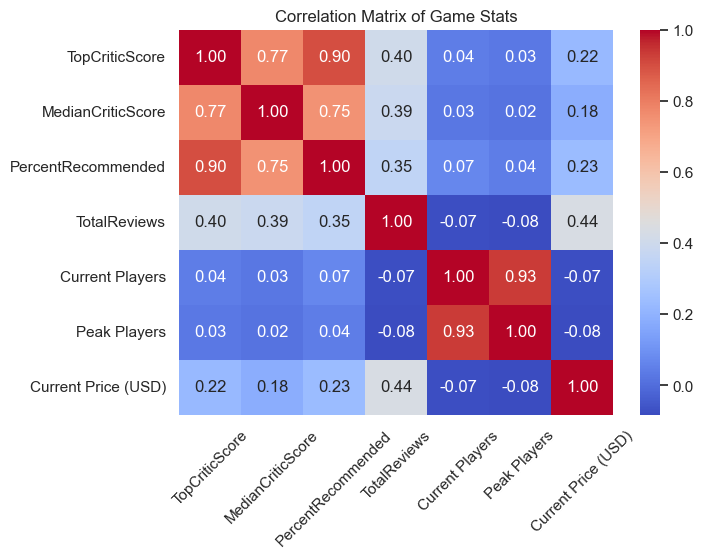

In [30]:
plt.figure(figsize=(7,5))
columns = ["TopCriticScore", "MedianCriticScore", "PercentRecommended", "TotalReviews", "Current Players", "Peak Players", "Current Price (USD)"]
sns.heatmap(df_clean[columns].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Game Stats")
plt.xticks(rotation=45)

plt.show()

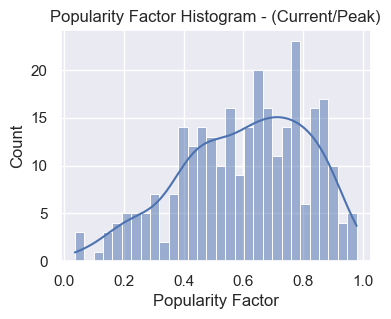

In [31]:
plt.figure(figsize=(4,3))
sns.histplot(df_clean["Popularity_Factor"], bins=30, kde=True)
plt.title("Popularity Factor Histogram - (Current/Peak)")
plt.xlabel("Popularity Factor")
plt.ylabel("Count")

plt.show()

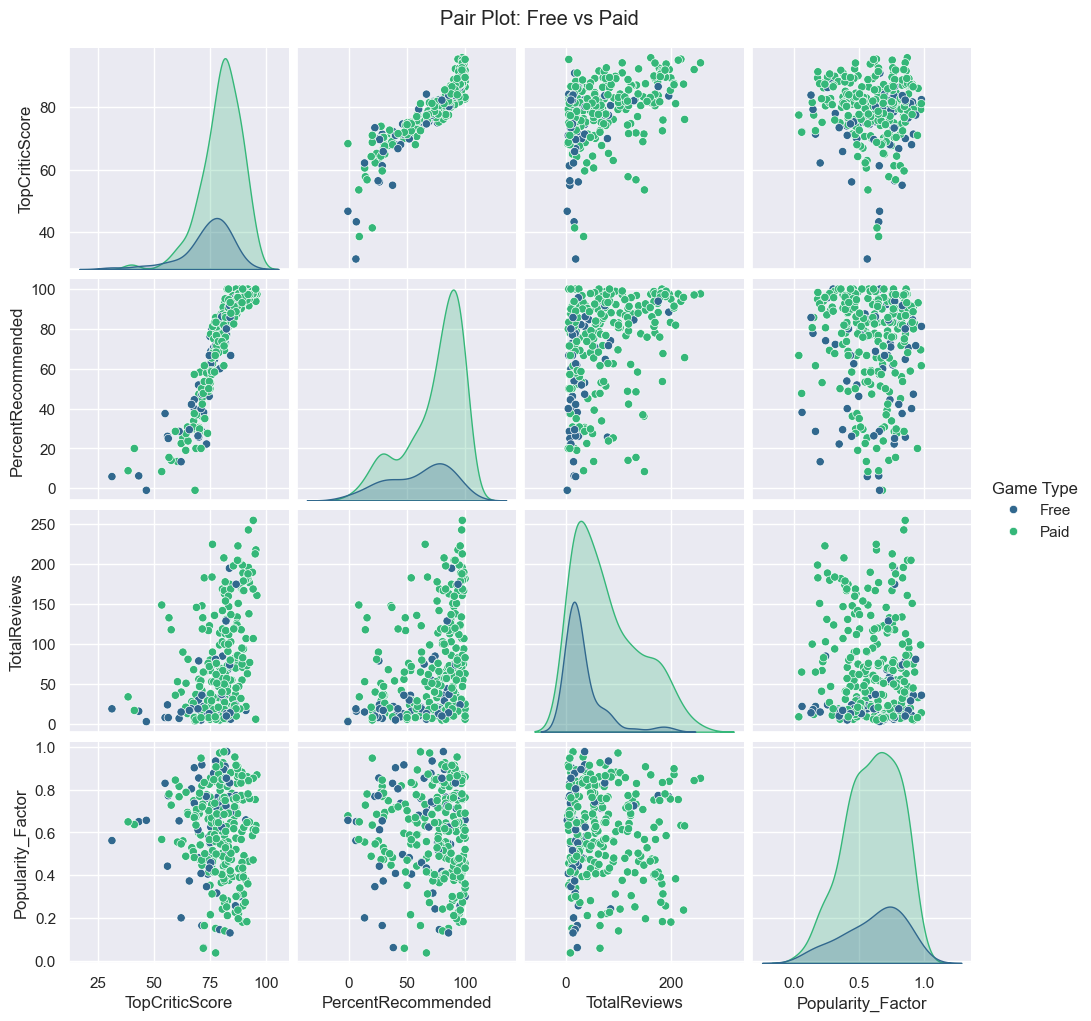

In [42]:
# Pair plot for comparison of free vs paid
df_temporary = df_clean.copy()
df_temporary["Game Type"] = df_temporary["Free game?"].map({True: "Free", False: "Paid"})

columns = ["TopCriticScore", "PercentRecommended", "TotalReviews", "Popularity_Factor"]
sns.pairplot(df_temporary, vars=columns, hue="Game Type", diag_kind="kde", corner=False, palette="viridis")

plt.suptitle("Pair Plot: Free vs Paid", y=1.02)

plt.show()